In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


file_path = 'transport.csv'
breakdowns_df = pd.read_csv(file_path)

In [2]:
# Обзор данных
print("Общая Информация")
print(f"Размер: {breakdowns_df.shape}")
print("\nПервые 5 строк:")
display(breakdowns_df.head())

Общая Информация
Размер: (7605, 9)

Первые 5 строк:


,ID ТС,Дата записи,Пробег (км),Возраст ТС (лет),Количество ТО за год,Загрузка (%),Средняя скорость (км/ч),Средняя нагрузка двигателя (%),Поломка в ближайший месяц
0,VEH92568,2019-01-01,1067790.0,20.0,1.0,35.8,76.0,38.0,1
1,VEH51120,2019-01-02,341095.0,8.0,3.0,42.1,66.0,90.0,0
2,VEH79897,2019-01-02,200772.0,3.0,10.0,30.4,93.0,46.0,0
3,VEH75308,2019-01-02,1122159.0,17.0,1.0,81.5,82.0,65.0,0
4,VEH29040,2019-01-02,15913.0,1.0,0.0,73.7,63.0,89.0,0


In [3]:
print("\nИнформация о колонках:")
breakdowns_df.info()


Информация о колонках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7605 entries, 0 to 7604
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID ТС                           7605 non-null   object 
 1   Дата записи                     7605 non-null   object 
 2   Пробег (км)                     7552 non-null   float64
 3   Возраст ТС (лет)                7552 non-null   float64
 4   Количество ТО за год            7453 non-null   float64
 5   Загрузка (%)                    7605 non-null   float64
 6   Средняя скорость (км/ч)         7605 non-null   float64
 7   Средняя нагрузка двигателя (%)  7476 non-null   float64
 8   Поломка в ближайший месяц       7605 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 534.9+ KB


In [4]:
# Описательная статистика числовых данных
display(breakdowns_df.describe().round(0))


,Пробег (км),Возраст ТС (лет),Количество ТО за год,Загрузка (%),Средняя скорость (км/ч),Средняя нагрузка двигателя (%),Поломка в ближайший месяц
count,7552.0,7552.0,7453.0,7605.0,7605.0,7476.0,7605.0
mean,456047.0,10.0,5.0,65.0,55.0,65.0,0.0
std,346801.0,6.0,3.0,20.0,21.0,22.0,0.0
min,610.0,0.0,0.0,30.0,15.0,19.0,0.0
25%,170458.0,5.0,2.0,48.0,37.0,47.0,0.0
50%,373798.0,10.0,5.0,66.0,55.0,64.0,0.0
75%,743768.0,15.0,8.0,83.0,72.0,82.0,0.0
max,1253372.0,20.0,11.0,100.0,118.0,138.0,1.0


In [5]:
# Для строк
breakdowns_df.select_dtypes(include=['object', 'category']).describe()

,ID ТС,Дата записи
count,7605,7605
unique,7323,2123
top,VEH28457,2021-07-09
freq,3,12


In [6]:
# Пустые данные
print("\nMissing Values")
missing_counts = breakdowns_df.isnull().sum()
missing_percent = (missing_counts / len(breakdowns_df)) * 100
missing_data = pd.DataFrame({'Количество пропусков': missing_counts, 'Процент пропусков': missing_percent})
display(missing_data)


Missing Values


,Количество пропусков,Процент пропусков
ID ТС,0,0.000000
Дата записи,0,0.000000
Пробег (км),53,0.696910
Возраст ТС (лет),53,0.696910
Количество ТО за год,152,1.998685
Загрузка (%),0,0.000000
Средняя скорость (км/ч),0,0.000000
Средняя нагрузка двигателя (%),129,1.696252
Поломка в ближайший месяц,0,0.000000


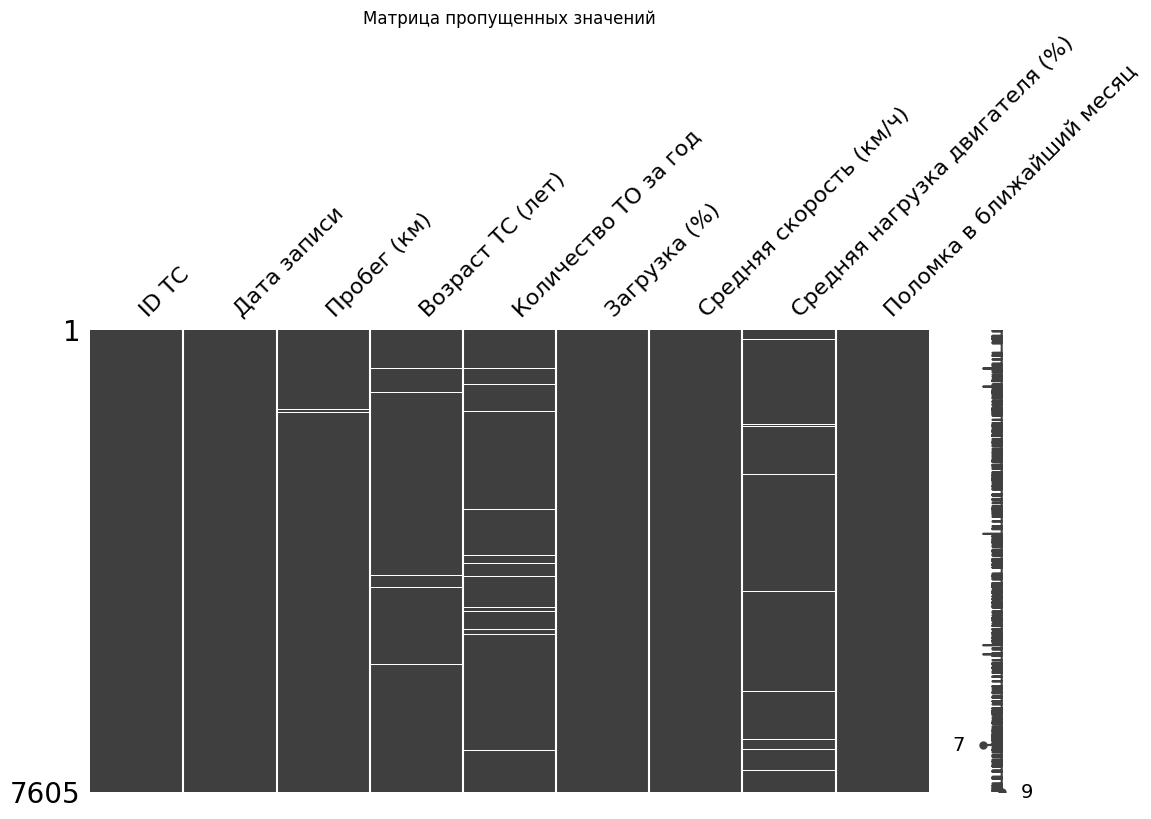

In [7]:
# Визуализация пропусков
msno.matrix(breakdowns_df, figsize=(12,6))
plt.title('Матрица пропущенных значений')
plt.show()


In [8]:
# Повторяющиеся строки
duplicate_count = breakdowns_df.duplicated().sum()
print(f"Количество дублированных строк: {duplicate_count}")


Количество дублированных строк: 0


In [9]:
# Анализ количества уникальных значений в каждой колонке
for col in breakdowns_df.columns:
    print(f"{col}: {breakdowns_df[col].nunique()} уникальных значений")

ID ТС: 7323 уникальных значений
Дата записи: 2123 уникальных значений
Пробег (км): 7507 уникальных значений
Возраст ТС (лет): 21 уникальных значений
Количество ТО за год: 12 уникальных значений
Загрузка (%): 701 уникальных значений
Средняя скорость (км/ч): 98 уникальных значений
Средняя нагрузка двигателя (%): 109 уникальных значений
Поломка в ближайший месяц: 2 уникальных значений


In [10]:
# Разделение признаков на числовые и категориальные
numeric_cols = breakdowns_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = breakdowns_df.select_dtypes(include=['object']).columns.tolist()

print("\nЧисловые признаки:", numeric_cols)
print("Категориальные признаки:", categorical_cols)


Числовые признаки: ['Пробег (км)', 'Возраст ТС (лет)', 'Количество ТО за год', 'Загрузка (%)', 'Средняя скорость (км/ч)', 'Средняя нагрузка двигателя (%)', 'Поломка в ближайший месяц']
Категориальные признаки: ['ID ТС', 'Дата записи']


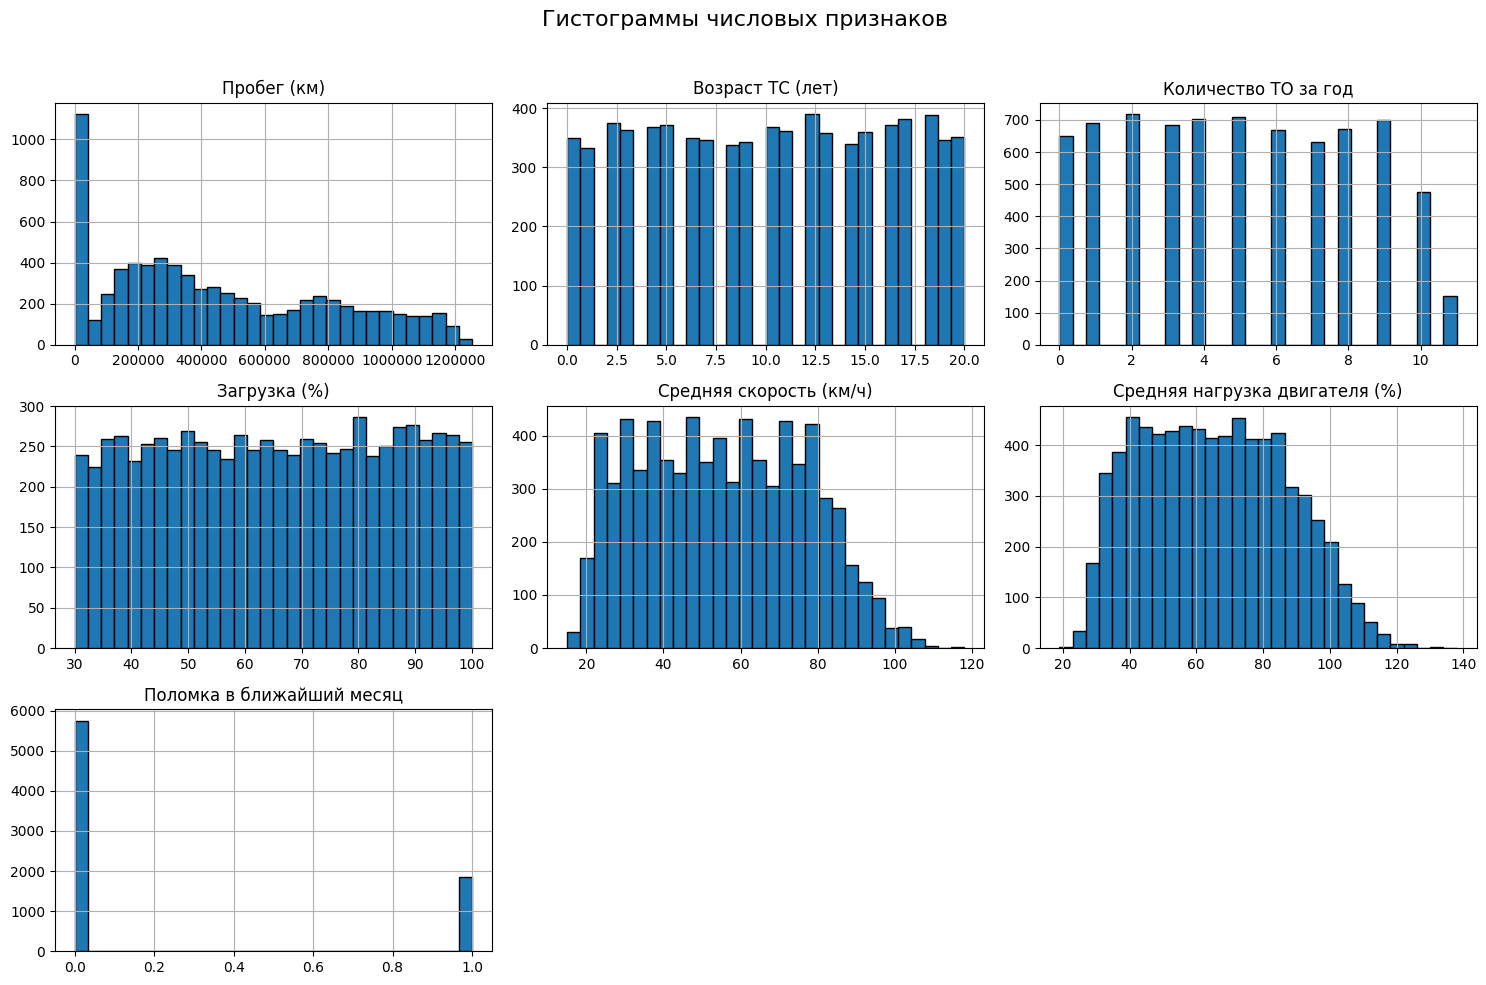

In [11]:
# Унивариантный анализ

# Гистограммы для числовых признаков
if numeric_cols:
    axes = breakdowns_df[numeric_cols].hist(bins=30, figsize=(15,10), edgecolor='black')
    plt.suptitle('Гистограммы числовых признаков', fontsize=16)


    for ax in axes.flatten():
        ax.ticklabel_format(style='plain', axis='x')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [12]:
# Отсутствуют категориальные данные для столбчатых диаграмм


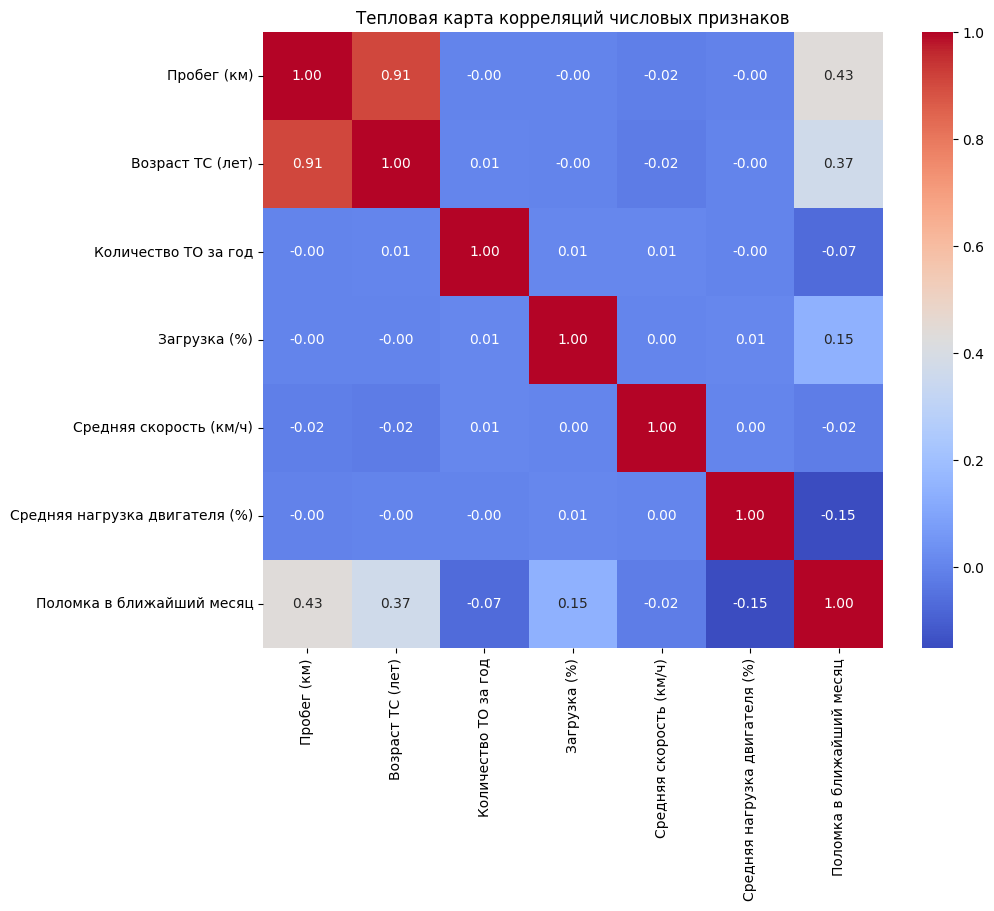

In [13]:
# Биварантный анализ

# Корреляционная матрица для числовых признаков
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(breakdowns_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Тепловая карта корреляций числовых признаков')
    plt.show()


In [14]:
# Отсутствуют категориальные данные для постройки анализа взаимосвязи категориальных признаков с целевой переменной

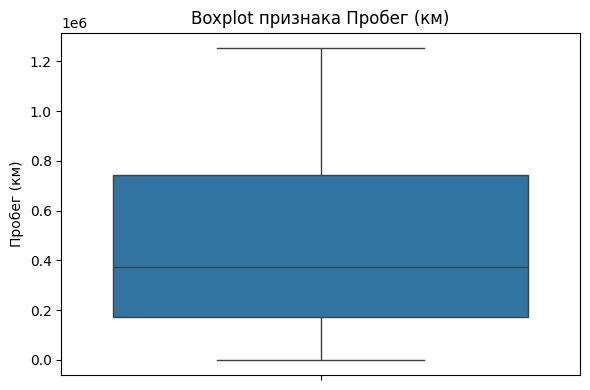

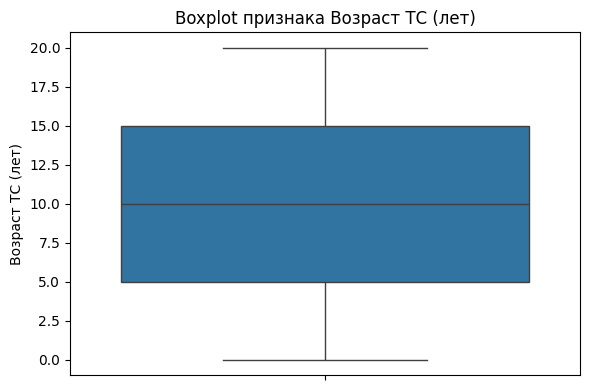

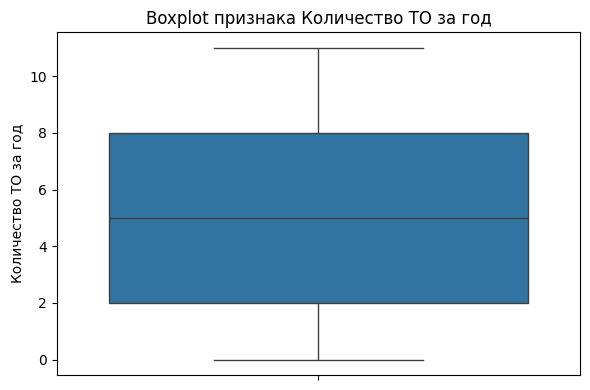

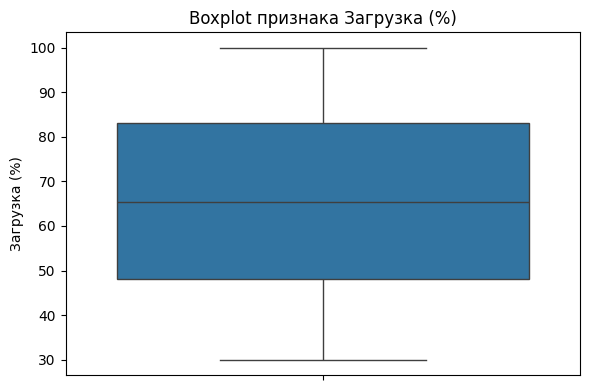

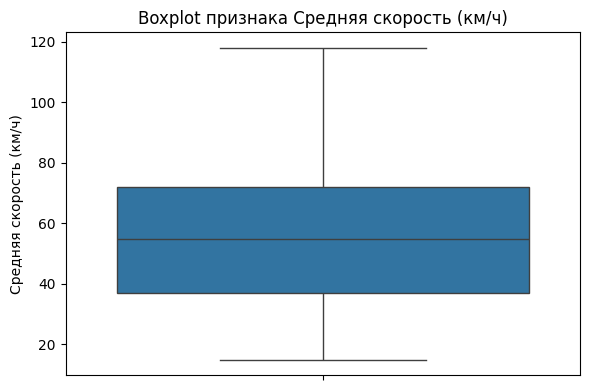

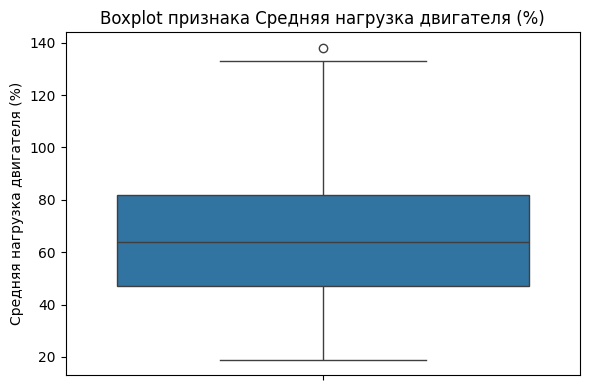

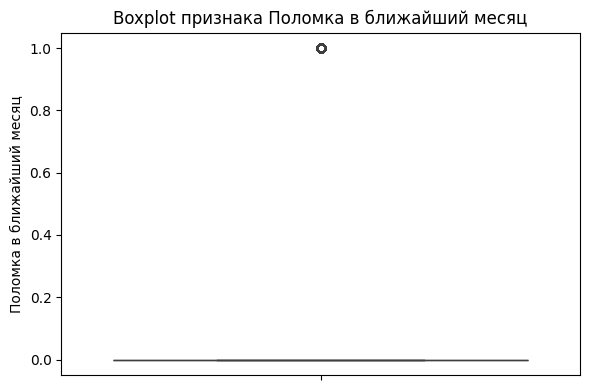

In [15]:
# Аномалии
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=breakdowns_df, y=col)
    plt.title(f'Boxplot признака {col}')
    plt.tight_layout()
    plt.show()



In [16]:
# Выводы по EDA
print("- Количество строк и столбцов:", breakdowns_df.shape)
print("- Обнаружено", duplicate_count, "дублированных строк.")
print("- Наличие пропущенных значений:")
display(missing_data[missing_data['Количество пропусков'] > 0])

if len(numeric_cols) > 0:
    print("- Числовые признаки:", numeric_cols)
else:
    print("- Числовые признаки отсутствуют.")

if len(categorical_cols) > 0:
    print("- Категориальные признаки:", categorical_cols)
else:
    print("- Категориальные признаки отсутствуют.")

- Количество строк и столбцов: (7605, 9)
- Обнаружено 0 дублированных строк.
- Наличие пропущенных значений:


,Количество пропусков,Процент пропусков
Пробег (км),53,0.696910
Возраст ТС (лет),53,0.696910
Количество ТО за год,152,1.998685
Средняя нагрузка двигателя (%),129,1.696252


- Числовые признаки: ['Пробег (км)', 'Возраст ТС (лет)', 'Количество ТО за год', 'Загрузка (%)', 'Средняя скорость (км/ч)', 'Средняя нагрузка двигателя (%)', 'Поломка в ближайший месяц']
- Категориальные признаки: ['ID ТС', 'Дата записи']
